In [128]:
import numpy as np
from sklearn import model_selection

In [129]:
data = np.loadtxt("train.csv",delimiter=',')

In [80]:
# whole data
N = len(data)
M = len(data[0])
x = data[:,:M-1]
y = data[:,M-1]
print(x[0])
print(y[0])
z = np.ones((N,))
x = np.c_[x,z]
print(x[0])

[-0.40784991 -0.48772236 -1.2660231  -0.27259857 -0.57613394  1.23997392
  0.84012202 -0.52026428 -0.75292215 -1.27835435 -0.30309415  0.41057102
 -1.09799011]
37.9
[-0.40784991 -0.48772236 -1.2660231  -0.27259857 -0.57613394  1.23997392
  0.84012202 -0.52026428 -0.75292215 -1.27835435 -0.30309415  0.41057102
 -1.09799011  1.        ]


In [81]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.3)

In [96]:
def cost(y_pred,y_true):
    N = len(y_true)
    total=((y_true-y_pred)**2).sum()
    total*=(1/N)
    return total

In [71]:
def step_gd(x,y,m,alpha):
    M = len(x[0])
    N = len(x)
    slope = np.zeros((M,))
    for j in range(M):
        for i in range(N):
#             print(y[i])
            temp=y[i]
            for k in range(M):
                temp-=m[k]*x[i,k]
            temp*=x[i,j]
            temp*=(-2/N)
#             print(temp)
            slope[j]+=temp
    for j in range(M):
        m[j]-=alpha*slope[j]
    return m

In [115]:
def gradient_descent(x,y):
    alpha = 0.15
    iterations = 200
    M = len(x[0])
    m = np.zeros((M,))
    for i in range(iterations):
        m = step_gd(x,y,m,alpha)
        print(cost(predict(x,m),y))
    return m

In [94]:
def run():
    return gradient_descent(x_train,y_train)

In [116]:
coeff = run()

308.47596776454276
167.4977248500738
98.27867423421588
63.87842022307546
46.4870488896736
37.4814787840506
32.66409684159118
29.976731706123328
28.40006270181357
27.422127979510197
26.780717207754474
26.337924781926812
26.018673920088812
25.780325462519098
25.597468853123573
25.45418042504769
25.33999047626159
25.24771766581692
25.1722614089435
25.10989830290037
25.05785247129699
25.01402073975275
24.976789302508486
24.944907009684634
24.9173952806518
24.893482655134793
24.872556462203175
24.85412668788674
24.837798704567703
24.823252531184092
24.810226958506743
24.798507328640856
24.787916077352328
24.7783053767659
24.769551382572434
24.76154971246348
24.754211873461813
24.747462423725228
24.7412367053575
24.735479023152255
24.730141173224116
24.725181247500558
24.720562656801512
24.716253328020123
24.71222504070609
24.70845287587028
24.704914755620898
24.70159105672046
24.698464284627608
24.695518797295954
24.692740570119636
24.69011699507934
24.687636708455308
24.68528944251463
24.6

In [117]:
def predict(_x,coeff):
    M = len(_x[0])
    N = len(_x)
    pred = np.zeros((N,))
    for i in range(N):
        for j in range(M):
            pred[i]+=coeff[j]*_x[i,j]
    return pred

In [120]:
y_pred = predict(x_test,coeff)
print(y_pred)

[22.90618854 18.60856177 21.38512139 11.42645772 42.41308691 34.70920351
 33.52440635 26.07609934 40.91646879 25.90462339 19.88044906 22.88646314
 19.14761564 18.42858776 21.96577929  7.80358851 20.80579982 18.0140103
 23.45749128 28.5489569  21.03481917  3.45406076  7.92458827 28.43630555
 33.91393076 18.66717225 24.23724666 25.32585568 38.02899578 16.45308719
 42.5920315  20.7254058  31.17297502 30.2446656  25.71319674 20.94169901
 16.36342289 20.24343087 19.50092776 24.79573541 28.75040162 25.193766
 20.80398367 24.98836111 31.31994154 26.17247208  5.88504451 21.54904135
 19.43181864 -6.60360094 40.24757029 22.23155959 40.07819    16.02642741
 39.32148927 26.10760783 26.44082505 20.96525053 13.23059011 36.12599459
 20.36309824 32.94039496 11.40106504 21.83984473 31.96576234 21.99153306
 28.78535591 23.60261516 18.74820401 21.84933437 23.93530115 30.32121253
 18.30523303 29.65075979 19.94871836 19.32271939 22.98887124 12.54752719
 21.98577074 25.01814355 13.33613718 29.10394091 13.94

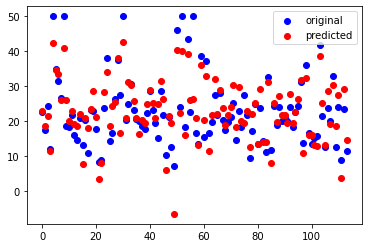

In [127]:
import matplotlib.pyplot as plt
temp = np.arange(0,len(x_test),1)
plt.scatter(temp,y_test,color='blue',label='original')
plt.scatter(temp,y_pred,color='red',label='predicted')
plt.legend()
plt.show()

In [139]:
# reading data to test
data_test = np.loadtxt("test.csv",delimiter=',')
# whole data
N = len(data_test)
M = len(data_test[0])
print(M)
x_to_test = data_test[:,:]
print(x_to_test.shape)
z = np.ones((N,))
x_to_test = np.c_[x_to_test,z]
print(x_to_test.shape)

13
(127, 13)
(127, 14)


In [140]:
print(x_to_test.shape)
print(coeff.shape)
y_pred_test = predict(x_to_test,coeff)
print(y_pred_test)

(127, 14)
(14,)
[11.40160699 29.9220007  22.30240999 24.95336351 20.83103619  2.592298
 29.80649708 24.58002168 18.87624781 23.767464   24.80287892 17.96153893
 18.71817876 22.43793807 41.91461264 24.09724416 25.11041521 27.50002246
 20.51507959 31.27611833 24.12354404 25.04559744 34.13208078 35.25305309
 32.23917841 17.16861841 23.25834942 32.86857012 24.27743137 32.91528898
 17.17658798 26.7576295  23.27012295 25.86018501 14.87233388 29.51530961
 26.44992367 20.55002391 24.86842822  8.27671743  8.00791983 29.17930731
 29.70628502 20.17499928 21.29645172  2.53511788 39.76092791 25.99840242
 30.24724656 17.36754471 18.26764605 39.99779705 18.12991535 21.06469267
 15.91841323 21.72102998 18.7237544  23.35234529 13.66069488 17.88849399
 13.26670845 29.42201405 25.16190546 26.01893528 17.82632073 16.57026468
 34.19260333 17.39734374 26.31555827 23.85011829 29.22221036 26.94715104
 17.37269013  5.4176899  36.22694043 25.42193942 29.77776066 27.19250357
 16.3172538  32.33409499 20.24098633 

In [143]:
np.savetxt("predictions.csv",y_pred_test,delimiter=',',fmt="%f")